# Exploring eBay Car Sales Data

**Scenario**: You receive a modified dataset of 50,000 used cars from *eBay Kleinanzeigen*, a classifieds section of the German eBay website. 

**Goal**: Note any significant findings from this dataset.

**Summary of Results**:

The top six most popular used car brands sold on the eBay site (in order) and their top selling model are:
1. Volkswagen Golf
2. BMW 3ER
3. Opel Corsa
4. Mercedes-Benz C-Klasse
5. Audi A4
6. Ford Focus

The mileage for these cars is within 125,000-130,000 kilometer range. 

On average, BMW, Mercedes-Benz, and Audi brands are sold in the \\$8,000-\\$9,000 range while the more affordable Opel and Ford brands are sold within the \\$3,000-\\$4,000 range. 21% of eBay's used cars are Volkswagens, averaging a selling price of \\$5,400.

Most used cars listed to sell are from Berlin and Rüsselsheim.

# Table of Contents

- [Data dictionary](#Data-dictionary)
- [Import the libraries](#Import-the-libraries)
- [Import the data](#Import-the-data)
    - View sample of imported data
    - View data information
    - Quick observations
- [Data cleanup](#Data-cleanup)
    - Remove insubstantial and redundant columns
    - Convert column names from camelCase to snakecase
        - Print list of current camelCase column names
        - Create a function to convert column names from camelCase to snakecase
        - Loop to create list of new column names that replace current column names
        - Manually optimize column names
    - Change data type for `price` and `odometer` stored as text
        - Convert non-numerical price to integer value
        - Change column name `price` to `price_dollars`
        - Convert non-numerical odometer to integer value
        - Change column name `odometer` to `odometer_km`
- [Data exploration](#Data-exploration)
    - Explore car price values
        - Find reasonable lower and upper bounds
        - Remove price outliers
    - Explore car odometer readings
    - Change data type for dates stored as text
        - Crawl dates
        - Ad creation dates
        - Last seen dates
    - Explore registration years
    - Explore columns with null values
        - Missing `vehicle_type` values
        - Missing `gearbox` values
        - Missing `model` values
        - Missing `fuel_type` values
        - Missing `not_repaired_damage` values
        - Takeaways for missing values
    - Explore price by brand
        - Most popular brands
        - Average prices for popular brands
        - Price and mileage comparison for top car brands
    - Explore postal codes
- [Conclusion](#Conclusion)
    


# Data dictionary

- `dateCrawled`: When this ad was first crawled. All field-values are taken from this date.
- `name`: Name of the car
- `seller`: Whether the seller is private or a dealer
- `offerType`: The type of listing
- `price`: The price on the ad to sell the car
- `abtest`: Whether the listing is included in an A/B test
- `vehicleType`: The vehicle Type
- `yearOfRegistration`: The year in which the car was first registered
- `gearbox`: The transmission type
- `powerPS`: The power of the car in PS
- `model`: The car model name
- `odometer`: How many kilometers the car has driven
- `monthOfRegistration`: The month in which the car was first registered.
- `fuelType`: What type of fuel the car uses
- `brand`: The brand of the car
- `notRepairedDamage`: If the car has a damage which is not yet repaired
- `dateCreated`: The date on which the eBay listing was created
- `nrOfPictures`: The number of pictures in the ad
- `postalCode`: The postal code for the location of the vehicle
- `lastSeen`: When the crawler saw this ad last online

# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the data

In [2]:
autos = pd.read_csv("autos.csv", encoding = "Latin-1")

### View sample of imported data

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### View data information

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [5]:
autos.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


## Quick observations

Use `index_to_view` to take a look at each column's contents

In [6]:
index_to_view = 3
autos.iloc[:, index_to_view].unique()

array(['Angebot', 'Gesuch'], dtype=object)

Looking at the unique contents for each column in the dataset, the following have been observed.

- There are a total of 20 columns, all of which have camelCase titles.
- Some columns have missing values, denoted by the non-null counts less than 50,000.
- The `price` and `odometer` values are non-numerical.
- The `dateCrawled`, `dateCreated`, and `lastSeen` values are also non-numerical.
- The `seller` and `offerType` columns appear to be redundant and also provide no substantial information.
- The `nrOfPictures` column only has one value of 0 for all rows so this column can be removed.

# Data cleanup

## Remove insubstantial and redundant columns

In [7]:
autos["seller"].unique()

array(['privat', 'gewerblich'], dtype=object)

In [8]:
autos["offerType"].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [9]:
autos["nrOfPictures"].unique()

array([0])

The `seller` and `offerType` columns do not provide information relevant to the cars themselves. These could've been provided by the web scraper or default values set on the eBay site. The `nrOfPictures` column has one value for all rows. All three columns can be removed from the analysis.

In [10]:
autos = autos.drop(["seller", "offerType", "nrOfPictures"], axis = 1)

In [11]:
print(autos.columns)

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'odometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')


## Convert column names from camelCase to snakecase

### Print list of current camelCase column names

In [12]:
old_columns = autos.columns
print(old_columns)

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'odometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')


### Create a function to convert column names from camelCase to snakecase

In [13]:
def snakecase(column_name):
    camel_name = column_name[0].capitalize() + column_name[1:]
    
    snake_name = ""
    for letter in camel_name:
        if letter.isupper():
            snake_name += "_" + letter
        else:
            snake_name += letter
    snake_name = snake_name.lower().lstrip("_")
    return snake_name

### Loop to create list of new column names then replace current column names

In [14]:
new_columns = []
for title in old_columns:
    snake_name = snakecase(title)
    new_columns.append(snake_name)

autos.columns = new_columns
print(autos.columns)

Index(['date_crawled', 'name', 'price', 'abtest', 'vehicle_type',
       'year_of_registration', 'gearbox', 'power_p_s', 'model', 'odometer',
       'month_of_registration', 'fuel_type', 'brand', 'not_repaired_damage',
       'date_created', 'postal_code', 'last_seen'],
      dtype='object')


### Manually optimize column names

We then review the list and note a few manual tweaks to make:
- `year_of_registration` can be changed to `registration_year`
- `power_p_s` can be changed to `power_ps` to preserve the ps unit
- `month_of_registration` can be changed to `registration_month`

More tweaks will be made later when we change the dtype for some of the columns.

In [15]:
autos.rename({"year_of_registration": "registration_year"}, axis = 1, inplace = True)
autos.rename({"power_p_s": "power_ps"}, axis = 1, inplace = True)
autos.rename({"month_of_registration": "registration_month"}, axis = 1, inplace = True)
print(autos.columns)

Index(['date_crawled', 'name', 'price', 'abtest', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer',
       'registration_month', 'fuel_type', 'brand', 'not_repaired_damage',
       'date_created', 'postal_code', 'last_seen'],
      dtype='object')


## Change data type for `price` and `odometer` stored as text

In [16]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_crawled         50000 non-null  object
 1   name                 50000 non-null  object
 2   price                50000 non-null  object
 3   abtest               50000 non-null  object
 4   vehicle_type         44905 non-null  object
 5   registration_year    50000 non-null  int64 
 6   gearbox              47320 non-null  object
 7   power_ps             50000 non-null  int64 
 8   model                47242 non-null  object
 9   odometer             50000 non-null  object
 10  registration_month   50000 non-null  int64 
 11  fuel_type            45518 non-null  object
 12  brand                50000 non-null  object
 13  not_repaired_damage  40171 non-null  object
 14  date_created         50000 non-null  object
 15  postal_code          50000 non-null  int64 
 16  last

As noted in our quick observations, the `price` and `odometer` are current `object` dtypes. We want to convert these to `float` and `int` dtypes, respectively.

### Convert non-numerical price to integer value

In [17]:
print(autos["price"].unique())

['$5,000' '$8,500' '$8,990' ... '$385' '$22,200' '$16,995']


The format for `price` is in the form `$#,###` so we remove the leading \\$ sign and any commas. As there are no decimal points, the eBay site most likely has the price field set to integer inputs.

In [18]:
autos["price"] = autos["price"].str.replace("$", "").str.replace(",", "").astype(int)

### Change column name `price` to `price_dollars`

We then change the column name from `price` to `price_dollars` to preserve the currency type.

In [19]:
autos.rename({"price": "price_dollars"}, axis = 1, inplace = True)

In [20]:
autos["price_dollars"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price_dollars, dtype: int64

In [21]:
print(autos.columns)

Index(['date_crawled', 'name', 'price_dollars', 'abtest', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer',
       'registration_month', 'fuel_type', 'brand', 'not_repaired_damage',
       'date_created', 'postal_code', 'last_seen'],
      dtype='object')


### Convert non-numerical odometer to integer value

In [22]:
print(autos["odometer"].unique())

['150,000km' '70,000km' '50,000km' '80,000km' '10,000km' '30,000km'
 '125,000km' '90,000km' '20,000km' '60,000km' '5,000km' '100,000km'
 '40,000km']


The format for `odometer` is in the form `#,###km` so we remove the trailing `km` and any commas.

In [23]:
autos["odometer"] = autos["odometer"].str.replace("km", "").str.replace(",", "").astype(int)

### Change column name `odometer` to `odometer_km`

We then change the column name from `odometer` to `odometer_km` to preserve the distance unit.

In [24]:
autos.rename({"odometer": "odometer_km"}, axis = 1, inplace = True)

In [25]:
print(autos["odometer_km"].head())

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int64


In [26]:
print(autos.columns)

Index(['date_crawled', 'name', 'price_dollars', 'abtest', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'not_repaired_damage',
       'date_created', 'postal_code', 'last_seen'],
      dtype='object')


# Data exploration

## Explore car price values

Now that the data has been cleaned for prices and odometer readings, we explore these columns, starting with the prices.

In [27]:
print(autos["price_dollars"].unique().shape)

(2357,)


There are 2,357 unique price listings.

In [28]:
autos["price_dollars"].value_counts().sort_index().head(30)

price_dollars
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
40       6
45       4
47       1
49       4
50      49
55       2
59       1
60       9
65       5
66       1
Name: count, dtype: int64

### Find reasonable lower and upper bounds

In [29]:
1421/50000*100

2.842

There are 1,421 cars with a price of \\$0. This is only 2.8\% of the dataset so we will consider removing these. Why the second lowest bound is \\$1 may be attributed to eBay defining the lowest non-zero bid amount. Therefore, we consider our lowest bound to be \\$1.

In [30]:
autos["price_dollars"].value_counts().sort_index(ascending=False).head(30)

price_dollars
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
194000      1
190000      1
180000      1
175000      1
169999      1
169000      1
163991      1
163500      1
155000      1
151990      1
Name: count, dtype: int64

In [31]:
14/50000*100

0.027999999999999997

There is a significant price spike after \$350,000 with 14 cars above that number, up to \\$1 billion. We can consider these 14 cars to be outliers as they only represent 0.03% of the dataset.

### Remove price outliers

In [32]:
autos = autos[autos["price_dollars"].between(1, 350000)]

In [33]:
autos.shape

(48565, 17)

In [34]:
50000-48565

1435

Therefore, we exclude prices outside the range of \\$1 - \\$350,000 from our analysis by removing the 1,435 outliers.

## Explore car odometer readings

Now that we've filtered the dataset for reasonable price values, we move on to odometer readings.

In [35]:
print(autos["odometer_km"].unique().shape)

(13,)


In [36]:
autos["odometer_km"].value_counts().sort_index().head(13)

odometer_km
5000        836
10000       253
20000       762
30000       780
40000       815
50000      1012
60000      1155
70000      1217
80000      1415
90000      1734
100000     2115
125000     5057
150000    31414
Name: count, dtype: int64

In [37]:
print(31414/48565*100)
print((2115+5057+31414)/48565*100)

64.68444352929063
79.45228044888295


There are more cars with high mileage than low mileage which may indicate most of the cars on this eBay site can potentially be much older. Assuming an average mileage of 10,000 km a year, 65% of the listings are 15+ year old cars and a whopping 79% of the listings are more than 10 years old. The high count of cars with the 150,000 km reading could be that this is the highest value eBay allows as an input on their site so we interpret the 150,000 category as cars with mileage at least 150,000 km.

There appears to be no outliers when analyzing mileage.

## Change data type for dates stored as text

Currently, the dates `date_crawled`, `date_created`, and `last_seen` are non-numerical and stored as strings. We'll want to convert these into a proper datetime format.

In [38]:
autos[["date_crawled", "date_created", "last_seen"]].head(10)

,date_crawled,date_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50
5,2016-03-21 13:47:45,2016-03-21 00:00:00,2016-04-06 09:45:21
6,2016-03-20 17:55:21,2016-03-20 00:00:00,2016-03-23 02:48:59
7,2016-03-16 18:55:19,2016-03-16 00:00:00,2016-04-07 03:17:32
8,2016-03-22 16:51:34,2016-03-22 00:00:00,2016-03-26 18:18:10
9,2016-03-16 13:47:02,2016-03-16 00:00:00,2016-04-06 10:46:35


Luckily for us, they appear all to have the same yyyy-mm-dd HH:MM:SS format.

In [39]:
print(autos["date_crawled"].shape)
print(autos["date_created"].shape)
print(autos["last_seen"].shape)

(48565,)
(48565,)
(48565,)


### Crawl dates

In [40]:
date_crawled_freq = autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

In [41]:
print(date_crawled_freq.head())
print(date_crawled_freq.tail())

date_crawled
2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
Name: proportion, dtype: float64
date_crawled
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: proportion, dtype: float64


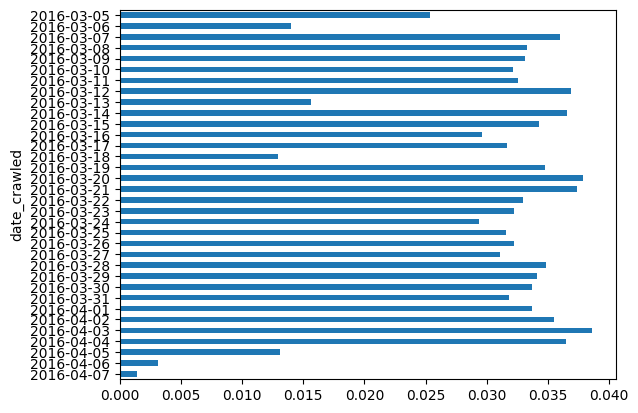

In [42]:
%matplotlib inline
ax = date_crawled_freq.plot(kind="barh")
ax.invert_yaxis()

The listings appeared to have been crawled over a one month period from March 2016 to April 2016. Aside from a few listings, the distribution appears to be relatively uniform.

### Ad creation dates

In [43]:
date_created_freq = autos["date_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

In [44]:
print(date_created_freq.head())
print(date_created_freq.tail())

date_created
2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
Name: proportion, dtype: float64
date_created
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: proportion, dtype: float64


Upon first glance, it appears that eBay wasn't utilized in earlier months as the dates created in 2015 span up to two months whereas the frequency turns into days by April 2015.

In [45]:
autos["date_created"].str[:7].value_counts()

date_created
2016-03    40673
2016-04     7813
2016-02       61
2016-01       12
2015-12        2
2015-11        1
2015-08        1
2015-06        1
2015-09        1
Name: count, dtype: int64

Bucketing the creation dates by month, it is apparent that the usage of this eBay to sell used cars did not pick up until early 2016.

In [46]:
autos[autos["date_created"].str[:7] < "2016-01"]

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
2243,2016-03-23 23:37:01,Gepflegter_Peugoet_207_Sport_VTi_Sport,5499,control,limousine,2009,manuell,95,2_reihe,70000,3,benzin,peugeot,nein,2015-11-10 00:00:00,22941,2016-04-07 09:15:21
20649,2016-03-08 17:57:45,Cabrio_Peugeot_206_CC_Platinium_zum_Winterpreis!,5200,control,cabrio,2006,manuell,109,2_reihe,80000,11,benzin,peugeot,nein,2015-08-10 00:00:00,26382,2016-04-05 20:46:54
22781,2016-03-23 01:48:59,Mercedes_Benz_C220_BT__7G_Tronic_AMG__Modellja...,47900,test,limousine,2014,automatik,0,c_klasse,20000,2,diesel,mercedes_benz,NaN,2015-06-11 00:00:00,46145,2016-04-06 09:47:02
27986,2016-03-18 10:41:20,Subaru_Impreza_GC_8__2.0__4x4__Super_Optik__Kl...,900,control,limousine,1997,automatik,115,impreza,150000,4,benzin,subaru,nein,2015-12-05 00:00:00,2943,2016-03-23 13:56:25
34883,2016-03-05 21:51:02,OPEL_CORSA_Apfelgruen_dringend_zu_verkaufen!,9500,test,kleinwagen,2013,manuell,90,corsa,50000,4,diesel,opel,nein,2015-09-09 00:00:00,98739,2016-04-05 17:46:04
36993,2016-03-15 23:57:10,Smart_fortwo_coupé_pulse__45kW/61_PS__schwarz,2400,control,limousine,2004,automatik,61,fortwo,90000,6,benzin,smart,nein,2015-12-30 00:00:00,10315,2016-04-06 15:17:11


Inspecting the six listings in 2015, four sold were limousines.

### Last seen dates

In [47]:
last_seen_freq = autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

In [48]:
print(last_seen_freq.head())
print(last_seen_freq.tail())

last_seen
2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
Name: proportion, dtype: float64
last_seen
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: proportion, dtype: float64


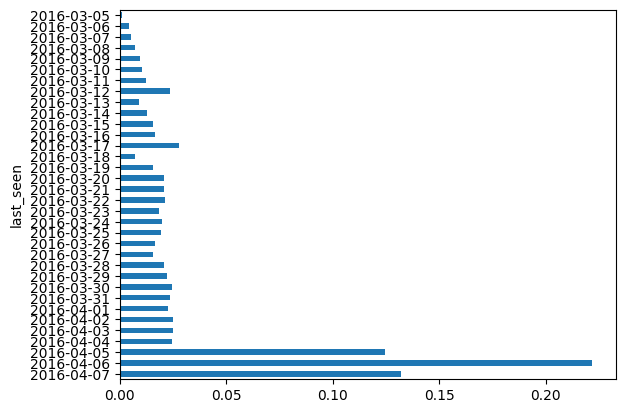

In [49]:
%matplotlib inline
ax = last_seen_freq.plot(kind="barh")
ax.invert_yaxis()

Aside from the most recent three days, it appears the distribution of car listings being removed, presumably due to being sold, is relatively uniform. One explanation for the discrepancy on April 5-7 could be the recency of the data being scraped and how often eBay updates the status of the listings.

## Explore registration years

In [50]:
autos["registration_year"].value_counts().sort_index()

registration_year
1000    1
1001    1
1111    1
1800    2
1910    5
       ..
5911    1
6200    1
8888    1
9000    1
9999    3
Name: count, Length: 95, dtype: int64

In [51]:
print(autos["registration_year"].value_counts().sort_index().head(10))

registration_year
1000    1
1001    1
1111    1
1800    2
1910    5
1927    1
1929    1
1931    1
1934    2
1937    4
Name: count, dtype: int64


In [52]:
5/48565*100

0.010295480284155256

Automobiles weren't invented until 1886 so we can remove the following five cars with incorrect registration years, bringing the total dataset row count down from 48,565 to 48,560.

In [53]:
autos[autos["registration_year"] < 1900]

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
10556,2016-04-01 06:02:10,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000,2,NaN,mitsubishi,nein,2016-04-01 00:00:00,63322,2016-04-01 09:42:30
22316,2016-03-29 16:56:41,VW_Kaefer.__Zwei_zum_Preis_von_einem.,1500,control,NaN,1000,manuell,0,kaefer,5000,0,benzin,volkswagen,NaN,2016-03-29 00:00:00,48324,2016-03-31 10:15:28
24511,2016-03-17 19:45:11,Trabant__wartburg__Ostalgie,490,control,NaN,1111,NaN,0,NaN,5000,0,NaN,trabant,NaN,2016-03-17 00:00:00,16818,2016-04-07 07:17:29
32585,2016-04-02 16:56:39,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000,2,NaN,mitsubishi,nein,2016-04-02 00:00:00,63322,2016-04-04 14:46:21
49283,2016-03-15 18:38:53,Citroen_HY,7750,control,NaN,1001,NaN,0,andere,5000,0,NaN,citroen,NaN,2016-03-15 00:00:00,66706,2016-04-06 18:47:20


Note the Citroen HY production years are between 1947 and 1981 but was listed with a registration year of 1001. Rather than attempting to correct this, and because the 5 cars only made up 1% of the whole dataset, it is removed from the analysis.

In [54]:
autos = autos[autos["registration_year"] > 1886]

In [55]:
autos.shape

(48560, 17)

In [56]:
print(autos["registration_year"].value_counts().sort_index().tail(20))

registration_year
2010    1589
2011    1623
2012    1310
2013     803
2014     663
2015     392
2016    1220
2017    1392
2018     470
2019       2
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       1
9999       3
Name: count, dtype: int64


Because April 7, 2016 was the most recent date the data was crawled, registration years higher than 2016 would be unreasonable. Therefore, we remove these from the analysis.

In [57]:
autos = autos[autos["registration_year"] <= 2016]

In [58]:
print(min(autos["registration_year"]))
print(max(autos["registration_year"]))

1910
2016


## Explore columns with null values

There are 5 columns with null values: `vehicle_type`, `gearbox`, `model`, `fuel_type` and `not_repaired_damage`.

### Missing `vehicle_type` values

In [59]:
autos["vehicle_type"].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [60]:
autos["vehicle_type"].isnull().sum()/len(autos)*100

5.7925065872624835

5.8\% of the dataset has missing values for `vehicle_type`.

In [61]:
autos[autos["vehicle_type"].isnull()].head()

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
8,2016-03-22 16:51:34,Seat_Arosa,250,test,NaN,2000,manuell,0,arosa,150000,10,NaN,seat,nein,2016-03-22 00:00:00,7426,2016-03-26 18:18:10
11,2016-03-16 18:45:34,Mercedes_A140_Motorschaden,350,control,NaN,2000,NaN,0,NaN,150000,0,benzin,mercedes_benz,NaN,2016-03-16 00:00:00,17498,2016-03-16 18:45:34
46,2016-03-31 10:53:28,BMW_mit__Lpg,9000,control,NaN,2005,automatik,0,NaN,150000,0,NaN,bmw,NaN,2016-03-31 00:00:00,12351,2016-04-06 03:44:41
59,2016-03-17 17:50:54,Mercedes_A_Klasse_W_168__A_140_gruen,700,control,NaN,2016,manuell,0,a_klasse,150000,0,benzin,mercedes_benz,NaN,2016-03-17 00:00:00,95356,2016-03-19 17:46:47
64,2016-04-05 07:36:19,Autotransport__Abschlepp_Schlepper,40,test,NaN,2011,NaN,0,5er,150000,5,NaN,bmw,NaN,2016-04-05 00:00:00,40591,2016-04-07 12:16:01


### Missing `gearbox` values

In [62]:
autos["gearbox"].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [63]:
autos["gearbox"].isnull().sum()/len(autos)*100

4.520040273344616

4.5\% of the dataset has missing values for `gearbox`.

In [64]:
autos[autos["gearbox"].isnull()].head()

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
11,2016-03-16 18:45:34,Mercedes_A140_Motorschaden,350,control,NaN,2000,NaN,0,NaN,150000,0,benzin,mercedes_benz,NaN,2016-03-16 00:00:00,17498,2016-03-16 18:45:34
52,2016-03-25 18:50:03,Senator_A_3.0E_Karosserie_restauriert_m._viele...,3500,test,limousine,1985,NaN,0,andere,5000,0,benzin,opel,nein,2016-03-25 00:00:00,63500,2016-04-07 00:46:00
60,2016-03-23 21:55:29,VW_Vento_1_8_Tuev_NEU,1199,test,limousine,1996,NaN,90,NaN,150000,0,benzin,volkswagen,nein,2016-03-23 00:00:00,1665,2016-04-06 05:45:36
64,2016-04-05 07:36:19,Autotransport__Abschlepp_Schlepper,40,test,NaN,2011,NaN,0,5er,150000,5,NaN,bmw,NaN,2016-04-05 00:00:00,40591,2016-04-07 12:16:01
92,2016-03-25 19:47:32,Zu_verkaufen,1900,test,NaN,2000,NaN,0,NaN,150000,0,NaN,bmw,NaN,2016-03-25 00:00:00,72108,2016-04-07 02:16:01


### Missing `model` values

In [65]:
autos["model"].unique()

array(['andere', '7er', 'golf', 'fortwo', 'focus', 'voyager', 'arosa',
       'megane', nan, 'a3', 'clio', 'vectra', 'scirocco', '3er', 'a4',
       '911', 'cooper', '5er', 'polo', 'e_klasse', '2_reihe', 'c_klasse',
       'corsa', 'mondeo', 'altea', 'a1', 'twingo', 'a_klasse', 'cl',
       '3_reihe', 's_klasse', 'sandero', 'passat', 'primera', 'wrangler',
       'a6', 'transporter', 'astra', 'v40', 'ibiza', 'micra', '1er',
       'yaris', 'colt', '6_reihe', '5_reihe', 'corolla', 'ka', 'tigra',
       'punto', 'vito', 'cordoba', 'galaxy', '100', 'octavia', 'm_klasse',
       'lupo', 'fiesta', 'superb', 'meriva', 'c_max', 'laguna', 'touran',
       '1_reihe', 'm_reihe', 'touareg', 'seicento', 'avensis', 'vivaro',
       'x_reihe', 'ducato', 'carnival', 'boxster', 'signum', 'sharan',
       'zafira', 'rav', 'a5', 'beetle', 'c_reihe', 'phaeton', 'i_reihe',
       'sl', 'insignia', 'up', 'civic', '80', 'mx_reihe', 'omega',
       'sorento', 'z_reihe', 'berlingo', 'clk', 's_max', 'kalos',
 

In [66]:
autos["model"].isnull().sum()/len(autos)*100

4.697842805424048

4.7\% of the dataset has missing values for `model`.

In [67]:
autos[autos["model"].isnull()].head()

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
11,2016-03-16 18:45:34,Mercedes_A140_Motorschaden,350,control,NaN,2000,NaN,0,NaN,150000,0,benzin,mercedes_benz,NaN,2016-03-16 00:00:00,17498,2016-03-16 18:45:34
15,2016-04-01 12:06:20,Corvette_C3_Coupe_T_Top_Crossfire_Injection,18900,test,coupe,1982,automatik,203,NaN,80000,6,benzin,sonstige_autos,nein,2016-04-01 00:00:00,61276,2016-04-02 21:10:48
23,2016-03-10 19:55:34,Peugeot_Boxer_2_2_HDi_120_Ps_9_Sitzer_inkl_Klima,7999,control,bus,2010,manuell,120,NaN,150000,2,diesel,peugeot,nein,2016-03-10 00:00:00,30900,2016-03-17 08:45:17
25,2016-03-21 21:56:18,Ford_escort_kombi_an_bastler_mit_ghia_ausstattung,90,control,kombi,1996,manuell,116,NaN,150000,4,benzin,ford,ja,2016-03-21 00:00:00,27574,2016-04-01 05:16:49
41,2016-03-10 10:46:08,Passat_3b_1.9_TDI_Highline__angemeldet_mit_tuv...,3200,test,kombi,2003,manuell,131,NaN,150000,7,NaN,volkswagen,nein,2016-03-10 00:00:00,28259,2016-04-06 20:19:08


### Missing `fuel_type` values

In [68]:
autos["fuel_type"].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [69]:
autos["fuel_type"].isnull().sum()/len(autos)*100

7.10781688481395

7.1\% of the dataset has missing values for `fuel_type`.

In [70]:
autos[autos["fuel_type"].isnull()].head()

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
8,2016-03-22 16:51:34,Seat_Arosa,250,test,NaN,2000,manuell,0,arosa,150000,10,NaN,seat,nein,2016-03-22 00:00:00,7426,2016-03-26 18:18:10
41,2016-03-10 10:46:08,Passat_3b_1.9_TDI_Highline__angemeldet_mit_tuv...,3200,test,kombi,2003,manuell,131,NaN,150000,7,NaN,volkswagen,nein,2016-03-10 00:00:00,28259,2016-04-06 20:19:08
46,2016-03-31 10:53:28,BMW_mit__Lpg,9000,control,NaN,2005,automatik,0,NaN,150000,0,NaN,bmw,NaN,2016-03-31 00:00:00,12351,2016-04-06 03:44:41
64,2016-04-05 07:36:19,Autotransport__Abschlepp_Schlepper,40,test,NaN,2011,NaN,0,5er,150000,5,NaN,bmw,NaN,2016-04-05 00:00:00,40591,2016-04-07 12:16:01
72,2016-03-14 07:55:36,Audi_A6_2.7_TDI,8100,control,kombi,2008,automatik,179,a6,150000,5,NaN,audi,nein,2016-03-14 00:00:00,97453,2016-04-07 08:17:00


### Missing `not_repaired_damage` values

In [71]:
autos["not_repaired_damage"].unique()

array(['nein', nan, 'ja'], dtype=object)

In [72]:
autos["not_repaired_damage"].isnull().sum()/len(autos)*100

17.795248602215032

18\% of the dataset has missing values for `fuel_type`.

In [73]:
autos[autos["not_repaired_damage"].isnull()].head()

,date_crawled,name,price_dollars,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,not_repaired_damage,date_created,postal_code,last_seen
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,7900,test,bus,2006,automatik,150,voyager,150000,4,diesel,chrysler,NaN,2016-03-21 00:00:00,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
11,2016-03-16 18:45:34,Mercedes_A140_Motorschaden,350,control,NaN,2000,NaN,0,NaN,150000,0,benzin,mercedes_benz,NaN,2016-03-16 00:00:00,17498,2016-03-16 18:45:34
14,2016-03-23 11:50:46,Renault_Clio_3__Dynamique_1.2__16_V;_viele_Ver...,3999,test,kleinwagen,2007,manuell,75,clio,150000,9,benzin,renault,NaN,2016-03-23 00:00:00,81737,2016-04-01 15:46:47
18,2016-03-26 19:57:44,Verkaufen_mein_bmw_e36_320_i_touring,300,control,bus,1995,manuell,150,3er,150000,0,benzin,bmw,NaN,2016-03-26 00:00:00,54329,2016-04-02 12:16:41


### Takeaways for missing values

Missing values for `vehicle_type`, `gearbox`, `model`, `fuel_type` and `not_repaired_damage` represent only a small subset of the dataset (between 4.5-7.1\%) except for `not_repaired_damage` at 18\%. 

Inspecting the samples for each column, it appears that if the vehicle type is not provided, there is a high chance that the subsequent four columns listed above will most likely not be provided as well. 

For cars with missing model values, this is simply the seller not providing the information as the model does show up in the `name` column. It may be that they chose not to enter this information or that the eBay site did not include it in a drop-down box. 

The fuel type at 7.1\% may indicate that the seller might not readily know this information compared to the other car details.

Almost a fifth of the car listings did not provide whether the car had damage and if so, whether it was repaired or not. This most likely might be that eBay site's default value for this column is blank, with alternative options `ja` and `nein` the seller can choose from but don't 82% of the time. Since used cars weather over time, it may be unclear to the seller as to how large the damage needs to be in order to classify it as a damaged but not repaired car.

## Explore price by brand

We are interested in learning about the buyer demographics on the eBay site. What are the most popular car brands that are sold?

### Most popular brands

In [74]:
autos["brand"].describe()

count          46681
unique            40
top       volkswagen
freq            9862
Name: brand, dtype: object

In [75]:
autos["brand"].value_counts().head(10)

brand
volkswagen       9862
bmw              5137
opel             5022
mercedes_benz    4503
audi             4041
ford             3263
renault          2201
peugeot          1393
fiat             1197
seat              853
Name: count, dtype: int64

Listed above are the top 10 used car brands.

In [76]:
brand_distribution = autos["brand"].value_counts(normalize=True)
print(brand_distribution)

brand
volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.00

There are 40 unique car brands for used cars sold. Volkswagen is the most popular, with 9,862 cars or 21\% of all used cars sold on eBay.

We narrow down the analysis to the top 6 cars - those that are 5% or more of the total dataset. This list will include the `volkswagen`, `bmw`, `opel`, `mercedes-benz`, `audi`, and `ford`.

In [77]:
top_6_brands = brand_distribution[brand_distribution > 0.05].index
print(top_6_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object', name='brand')


### Average prices for popular brands

In [78]:
avg_prices_top_6 = {}
for brand in top_6_brands:
    brand_name = autos[autos["brand"] == brand]
    avg_price = brand_name["price_dollars"].mean()
    avg_prices_top_6[brand] = int(avg_price)

print(avg_prices_top_6)

{'volkswagen': 5402, 'bmw': 8332, 'opel': 2975, 'mercedes_benz': 8628, 'audi': 9336, 'ford': 3749}


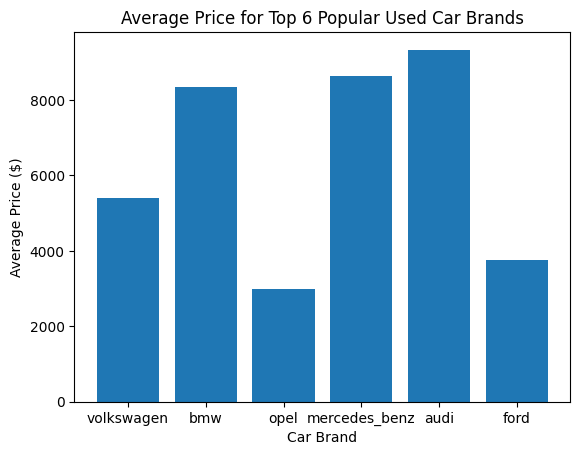

In [79]:
x = avg_prices_top_6.keys()
y = avg_prices_top_6.values()
plt.bar(x, y)
plt.title("Average Price for Top 6 Popular Used Car Brands")
plt.xlabel("Car Brand")
plt.ylabel("Average Price ($)")
plt.show()

BMW (\\$8,332), Mercedes-Benz (\\$8,628), and Audi (\\$9,336) are the most expensive out of the top 6 most popular used car brands sold on the eBay site while Opel ($2,975) and Ford (\\$3,749) are the most affordable. Volkswagen (\\$5,402) is the top selling used car brand. Its popularity may be attributed to its moderately average price compared to the other five brands.

## Explore mileage by brand

For the top six brands, we explore their odometer readings to gain a better sense of how "used" the cars are.

### Average mileage for popular brands

We narrow down the analysis to the top 6 cars - those that are 5% or more of the total dataset. This list will include the `volkswagen`, `bmw`, `opel`, `mercedes-benz`, `audi`, and `ford`.

In [80]:
avg_mileage_top_6 = {}
for brand in top_6_brands:
    brand_name = autos[autos["brand"] == brand]
    avg_mileage = brand_name["odometer_km"].mean()
    avg_mileage_top_6[brand] = int(avg_mileage)

print(avg_mileage_top_6)

{'volkswagen': 128707, 'bmw': 132572, 'opel': 129310, 'mercedes_benz': 130788, 'audi': 129157, 'ford': 124266}


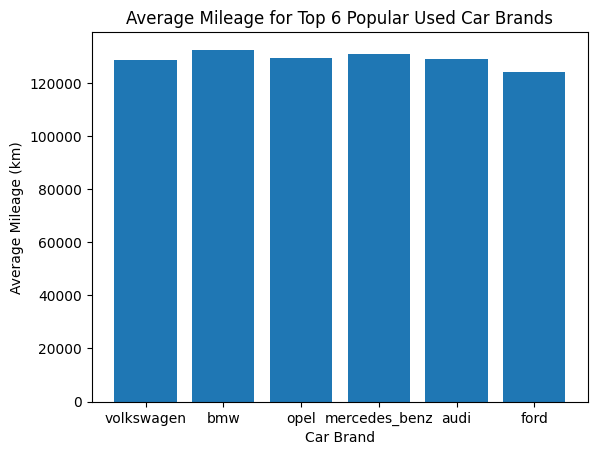

In [81]:
top_6 = avg_mileage_top_6.keys()
mileage = avg_mileage_top_6.values()
plt.bar(top_6, mileage)
plt.title("Average Mileage for Top 6 Popular Used Car Brands")
plt.xlabel("Car Brand")
plt.ylabel("Average Mileage (km)")
plt.show()

Overall, the top six most popular used cars do not vary significant in terms of average mileage. Out of the top six, `ford` has the lowest average mileage of the three at 124,266 km while `bmw` has the highest at 132,572 km.

## Price and mileage comparison for top car brands

/var/folders/pv/sq6mvfsn30l44lsqjxd00lj00000gn/T/ipykernel_59955/1740998316.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'])


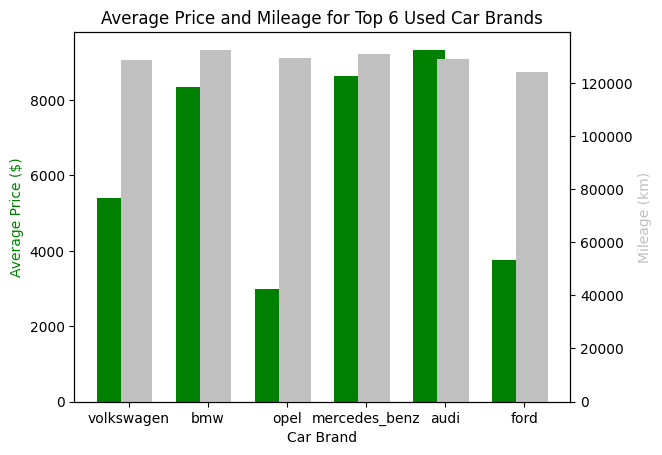

In [82]:
price = avg_prices_top_6.values()

X_axis = np.arange(1,7)

fig, ax = plt.subplots()
plt.title("Average Price and Mileage for Top 6 Used Car Brands")

ax2 = ax.twinx()

price_color = "green"
mileage_color = "silver"

ax.bar(X_axis - 0.2, price, width = 0.4, color = price_color)
ax2.bar(X_axis + 0.1, mileage, width = 0.4, color = mileage_color)


ax.set_xlabel("Car Brand")
ax.set_ylabel("Average Price ($)", color = price_color)
ax2.set_ylabel("Mileage (km)", color = mileage_color)

# Used to override the index labels for x-axis used to offset the price and mileage bars
# This is currently producing a warning
ax.set_xticklabels(['', 'volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'])

plt.show()

The more expensive brands BMW, Mercedes-Benz, and Audi are also those that have slightly more mileage than the other three brands Volkswagen, Opel, and Ford.

In [83]:
for brand in top_6:
    print(autos.loc[autos["brand"] == brand, ["brand","model"]].value_counts().head())
    print("\n")

brand       model      
volkswagen  golf           3707
            polo           1609
            passat         1349
            transporter     674
            touran          433
Name: count, dtype: int64


brand  model  
bmw    3er        2615
       5er        1132
       1er         521
       x_reihe     296
       7er         126
Name: count, dtype: int64


brand  model 
opel   corsa     1592
       astra     1348
       vectra     544
       zafira     394
       omega      181
Name: count, dtype: int64


brand          model   
mercedes_benz  c_klasse    1136
               e_klasse     958
               a_klasse     539
               andere       439
               clk          242
Name: count, dtype: int64


brand  model 
audi   a4        1231
       a3         825
       a6         797
       andere     216
       80         198
Name: count, dtype: int64


brand  model 
ford   focus     762
       fiesta    722
       mondeo    479
       ka        349
       andere   

## Explore postal codes

In [84]:
autos["postal_code"].value_counts().head(10)

postal_code
10115    108
65428     98
66333     48
45888     48
44145     46
65933     43
65719     43
48599     42
77933     40
30419     39
Name: count, dtype: int64

# Conclusion

The top six most popular used car brands sold on the eBay site (in order) and their top selling model are:
1. Volkswagen Golf
2. BMW 3ER
3. Opel Corsa
4. Mercedes-Benz C-Klasse
5. Audi A4
6. Ford Focus

The mileage does not vary for these brands as they all are roughly within the 125,000-130,000 kilometer range. What is significantly different is the BMW, Mercedes-Benz, and Audi brands are sold at much higher prices (\\$8,000-\\$9,000 range) than the Opel and Ford brands (\\$3,000-\\$4,000), with the Volkswagen being a "happy medium" priced at \\$5,400.

Used cars mostly come from Berlin (postal code 10115) and Rüsselsheim (65428).